<a href="https://colab.research.google.com/github/aileendugan/CompVisionBoneXrayProject/blob/main/CV1_CNN_based_MURA_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Loading the data

11490434/11490434 [==============================] - 0s 0us/step
9


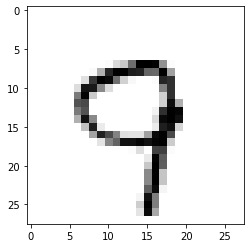

In [ ]:
# Computer Vision I Course (CSE 40535/60535)
# University of Notre Dame, Fall 2022
# ________________________________________________________________________________
# Adam Czajka, February 2022
# Based on Keras documentation available at https://keras.io/examples/vision/mnist_convnet/

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools as it

# Load database of handwritten digits (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Let's show one example from the dataset
image_index = 23876 # you may select anything from 0 to 59,999 (we have 60,000 training samples)
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2: Reshaping to 28 x 28 tensors and normalizing pixel intensities to the [0,1] range

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 128, 128, 1)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the 8-bit grayscale intensities by dividing them by the max intensity value
x_train /= 255
x_test /= 255

# Step 3: Building the convolutional neural network

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
# *** we need to import implementations of a few extra layers:
from tensorflow.keras import optimizers

# Creating a Sequential Model and adding the layers
model = Sequential()

# *** Now we need to add a few layers. We will use model.add() function:
model.add(Conv2D(filters=16, kernel_size =(3,3), input_shape = input_shape, activation = 'relu'))
model.add(Flatten())
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 10)                108170    
                                                                 
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
_________________________________________________________________


# Step 4: Training

In [ ]:
epochs = 3  # how many times the network will see the ENTIRE training set

sgd = optimizers.SGD(learning_rate = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('-TRAINING----------------------------')
print('Input shape:', x_train.shape)
print('Number of training images: ', x_train.shape[0])

model.fit(x=x_train, y=y_train, epochs=epochs)

-TRAINING----------------------------
Input shape: (60000, 28, 28, 1)
Number of training images:  60000
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1029
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987


# Step 5: Let's see what the network learned: evaluate it on test (unseen) data 

-TESTING-----------------------------
Number of test images: 10000
313/313 [==============================] - 1s 3ms/step - loss: 0.1109 - accuracy: 0.9712
Test loss: 0.11090055108070374
Test accuracy: 0.9711999893188477
1/1 [==============================] - 0s 19ms/step


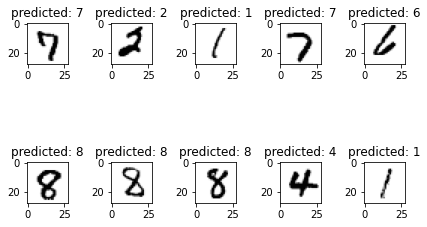

In [ ]:
print('-TESTING-----------------------------')
print('Number of test images:', x_test.shape[0])
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Print 10 example test digits with their true and predicted labels
fig, axes = plt.subplots(2, 5)
fig.tight_layout()

image_idx = np.random.randint(1,10000,(2,5))

for i, j in it.product(range(2), range(5)):
    test_image = x_test[image_idx[i,j]].reshape(1, 28, 28, 1)
    test_label = y_test[image_idx[i,j]]
    softmax_outputs = model.predict(test_image)
    pred_label = softmax_outputs.argmax()

    axes[i, j].imshow(test_image.reshape(28, 28),cmap='Greys')
    axes[i, j].set_aspect('equal', 'box')
    axes[i, j].set_title("predicted: {}".format(test_label,pred_label))

plt.show()

# Optional step 6: visualize learned kernels in the convolutional layer

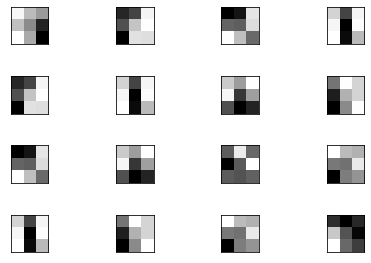

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()

        # normalize filter values to 0-1 so we can visualize them
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

fig, axes = plt.subplots(4, 4)
fig.tight_layout()
  
for i, j in it.product(range(4),range(4)):
    axes[i, j].imshow(filters[:,:,0,(i+1)*(j+1)-1],cmap='Greys')
    axes[i, j].set_aspect('equal', 'box')

plt.setp(axes, xticks = [], yticks = [])
plt.show()